## Housing price prediction using ANN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Processing missing values

In [7]:
df_train.isnull().sum().sort_values(ascending =False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

Percentage of missing data

In [8]:
df_train.isnull().sum().sort_values(ascending =False).head(20)/len(df_train)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Utilities       0.000000
dtype: float64

Removing the parameters with missing data greater than 15% and also removing catagorical parameters with null values

In [9]:
df_train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage','GarageCond','GarageType','GarageYrBlt','GarageQual','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual'],axis=1,inplace=True)
df_test.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage','GarageCond','GarageType','GarageYrBlt','GarageQual','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual'],axis=1,inplace=True)

Treatment of left parameters having missing values

In [10]:
import random
missing_values = df_train.columns[df_train.isna().any()].to_list()
for each in missing_values:
    if (df_train[each].dtypes =='float64'):
        minimum= int(df_train[each].quantile(0.25))
        maximum= int(df_train[each].quantile(0.75))
        A=df_train[df_train[each].isnull()].index.tolist()
        for i in A:
            df_train.loc[i,each]=random.randint(minimum,maximum)
        df_train[each]=pd.to_numeric(df_train[each])
   

    elif(df_train[each].dtypes == 'object'):
        if ('True' in str(df_train[each].str.contains('No').unique().tolist())):
            df_train[each].fillna('No',inplace=True)
        elif('True' in str(df_train[each].str.contains('None').unique().tolist())):
            df_train[each].fillna('None',inplace=True)
        elif('True' in str(df_train[each].str.contains('Unf').unique().tolist())):
            df_train[each].fillna('Unf',inplace=True)
        else:
            A=df_train[df_train[each].isnull()].index.tolist()
            unique = df_train[each].unique().tolist()
            unique=pd.Series(unique).dropna().tolist()
            for i in A:
                df_train.loc[i,each]=random.choice(unique)


missing_values = df_test.columns[df_test.isna().any()].to_list()
for each in missing_values:
    if (df_test[each].dtypes =='float64'):
        minimum= int(df_test[each].quantile(0.25))
        maximum= int(df_test[each].quantile(0.75))
        A=df_test[df_test[each].isnull()].index.tolist()
        for i in A:
            df_test.loc[i,each]=random.randint(minimum,maximum)
        df_test[each]=pd.to_numeric(df_test[each])
   

    elif(df_test[each].dtypes == 'object'):
        if ('True' in str(df_test[each].str.contains('No').unique().tolist())):
            df_test[each].fillna('No',inplace=True)
        elif('True' in str(df_test[each].str.contains('None').unique().tolist())):
            df_test[each].fillna('None',inplace=True)
        elif('True' in str(df_test[each].str.contains('Unf').unique().tolist())):
            df_test[each].fillna('Unf',inplace=True)
        else:
            A=df_test[df_test[each].isnull()].index.tolist()
            unique = df_test[each].unique().tolist()
            unique=pd.Series(unique).dropna().tolist()
            for i in A:
                df_test.loc[i,each]=random.choice(unique)


Removing the Id column

In [11]:
df_train.drop(['Id'],axis=1,inplace=True)
df_test.drop(['Id'],axis=1,inplace=True)

Now checking the correlation between continuous parameters and plotting the heatmap

# Exploratory data analysis

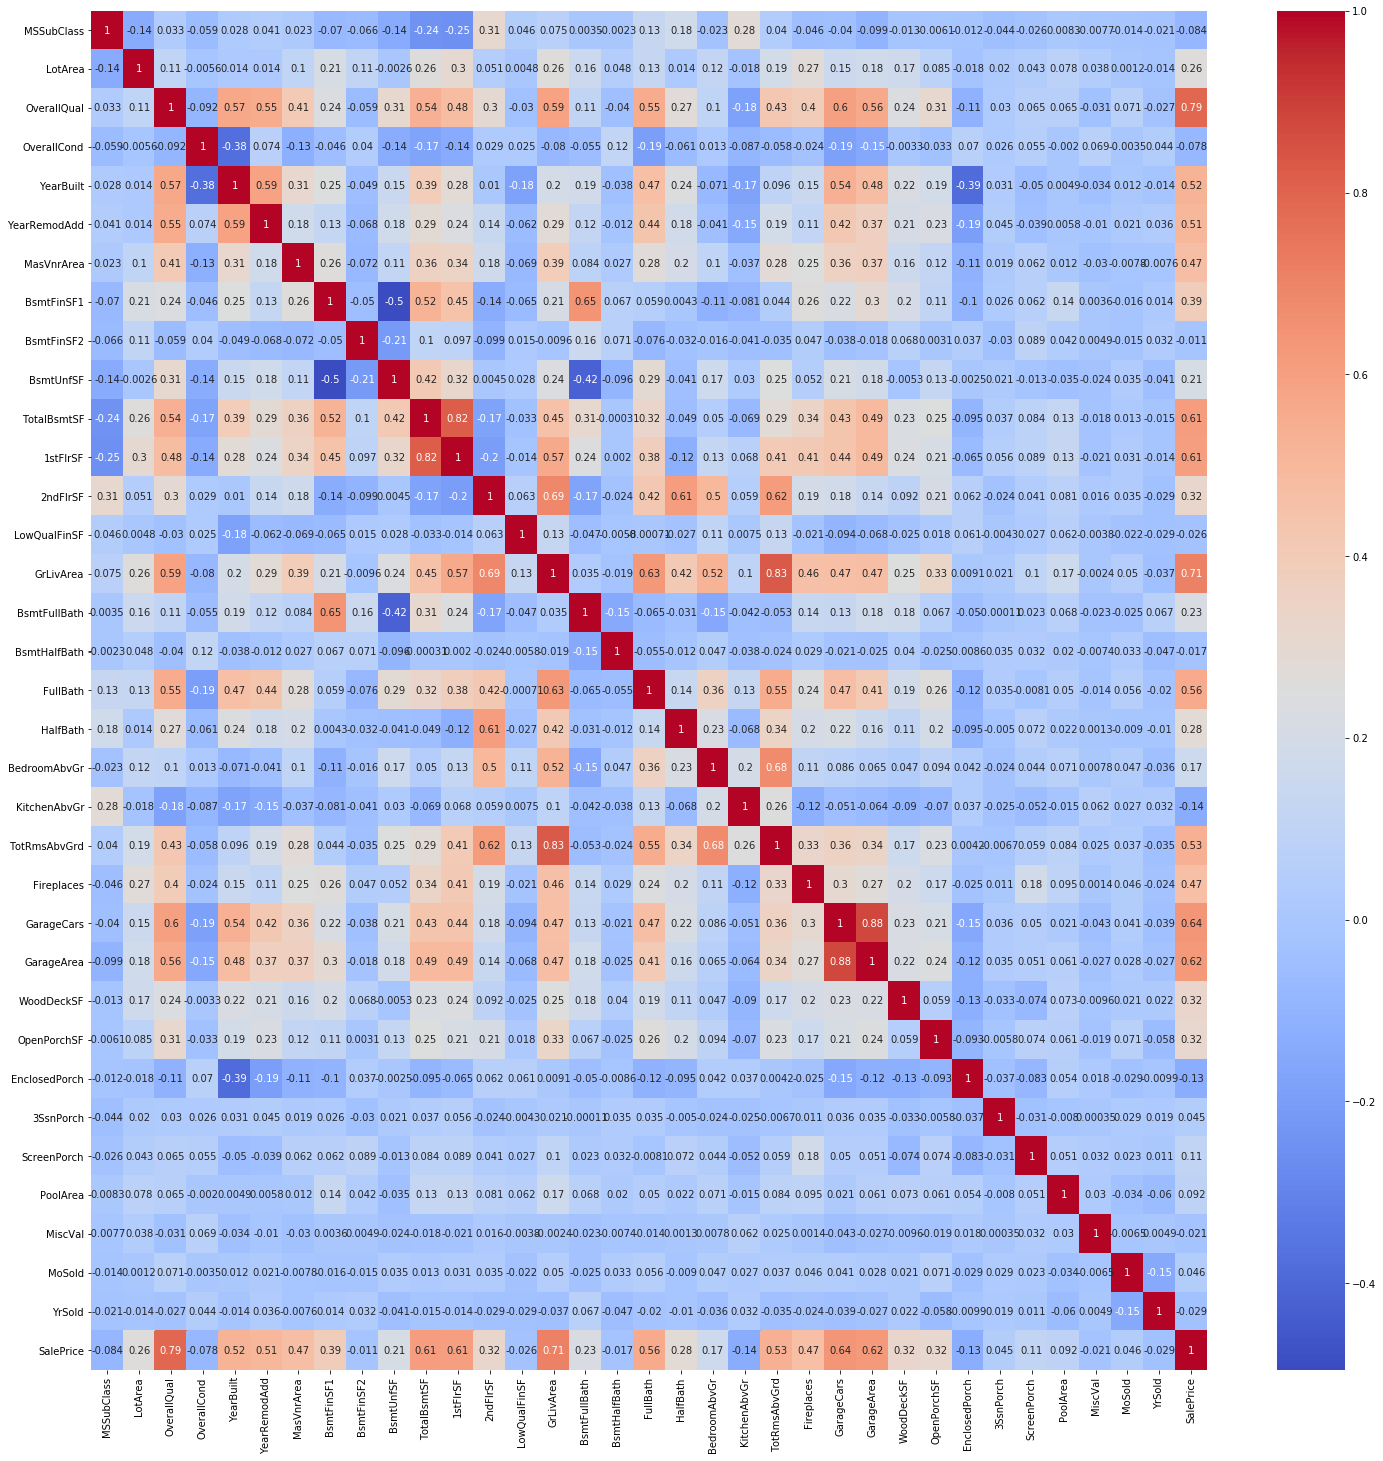

In [12]:
plt.figure(figsize=(25,25))
sns.heatmap(df_train.corr(),annot=True,cmap='coolwarm')

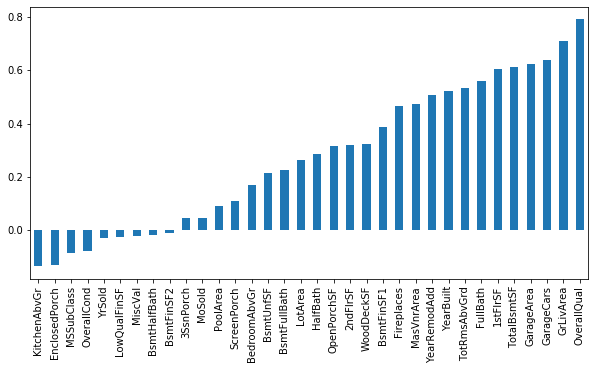

In [13]:
plt.figure(figsize=(10,5))
df_train.corr()['SalePrice'].sort_values().drop('SalePrice').plot(kind='bar')

For continous parameters, the most correlated values to Sale Price are given in the above plot

Now, analysing some most correlated parameters using Seaborn 

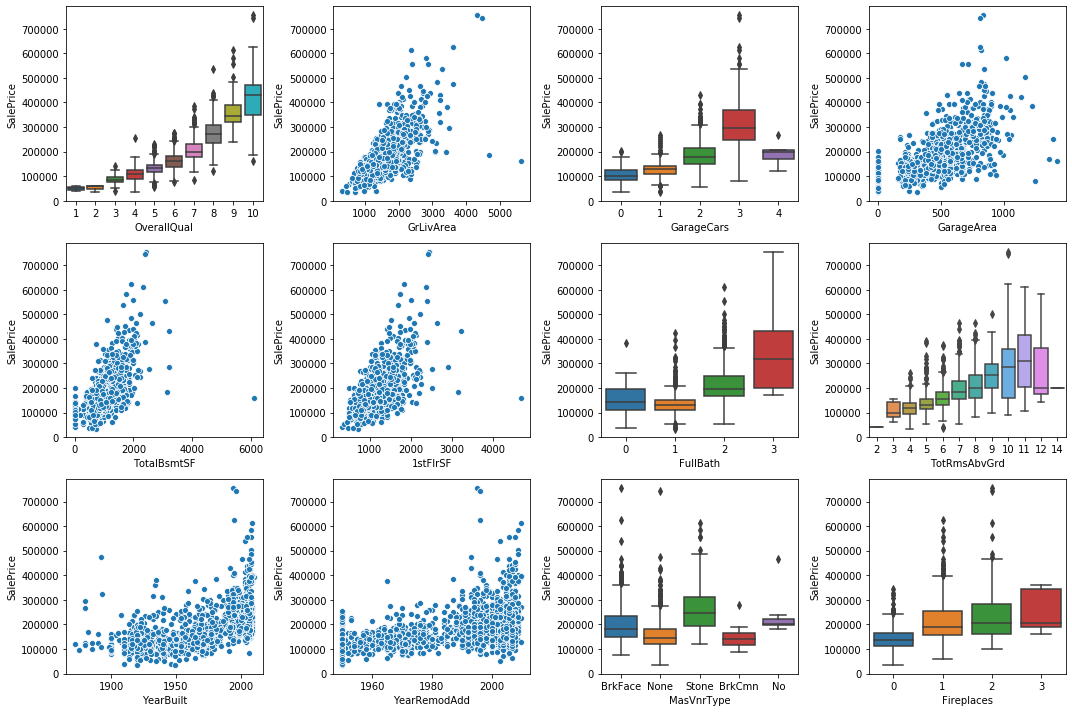

In [14]:
fig = plt.figure(figsize=(15,10));   
ax1 = fig.add_subplot(3,4,1);  
ax2 = fig.add_subplot(3,4,2);
ax3 = fig.add_subplot(3,4,3);  
ax4 = fig.add_subplot(3,4,4);
ax5 = fig.add_subplot(3,4,5);  
ax6 = fig.add_subplot(3,4,6);
ax7 = fig.add_subplot(3,4,7);  
ax8 = fig.add_subplot(3,4,8);
ax9 = fig.add_subplot(3,4,9);  
ax10 = fig.add_subplot(3,4,10);
ax11 = fig.add_subplot(3,4,11);  
ax12 = fig.add_subplot(3,4,12);

sns.boxplot("OverallQual", "SalePrice", data=df_train,ax=ax1)
sns.scatterplot("GrLivArea", "SalePrice", data=df_train, ax=ax2)
sns.boxplot("GarageCars", "SalePrice", data=df_train,ax=ax3)
sns.scatterplot("GarageArea", "SalePrice", data=df_train, ax=ax4)
sns.scatterplot("TotalBsmtSF", "SalePrice", data=df_train,ax=ax5)
sns.scatterplot("1stFlrSF", "SalePrice", data=df_train, ax=ax6)
sns.boxplot("FullBath", "SalePrice", data=df_train,ax=ax7)
sns.boxplot("TotRmsAbvGrd", "SalePrice", data=df_train, ax=ax8)
sns.scatterplot("YearBuilt", "SalePrice", data=df_train,ax=ax9)
sns.scatterplot("YearRemodAdd", "SalePrice", data=df_train, ax=ax10)
sns.boxplot("MasVnrType", "SalePrice", data=df_train,ax=ax11)
sns.boxplot("Fireplaces", "SalePrice", data=df_train, ax=ax12)
plt.tight_layout()

#### Analysis from the above plot
Overall Quality
- SalePrice follows a linear relation with Overall quality of the house(as obvious)
- When OverallQual = 10, the range of SalePrice is between 350,000 to 500,000

Garage Cars
- Evidenty, if the house has size of garage for accomodating 3 cars, the selling price will be more  
- There are only 5 houses having 4 car space garage, so we can't say much about it, but the prices are lower than 3 car space houses

FullBath, Total Rooms above ground and Fireplaces
- More number of these parameter in the house, more is the selling price of the house
- When the parameter starts to increase the variation in SalePrice also increases because it starts depending on other paramters more to make an accurate prediction.  

MasVnrType
- Masonry veneer Stone type has more selling price followed by brick face and common brick

Scatter Plots
- all the scatterplots including GRLivArea, GarageArea, 1stFlrSF and TotalBsmtSF follows a linear trend with Sale Price



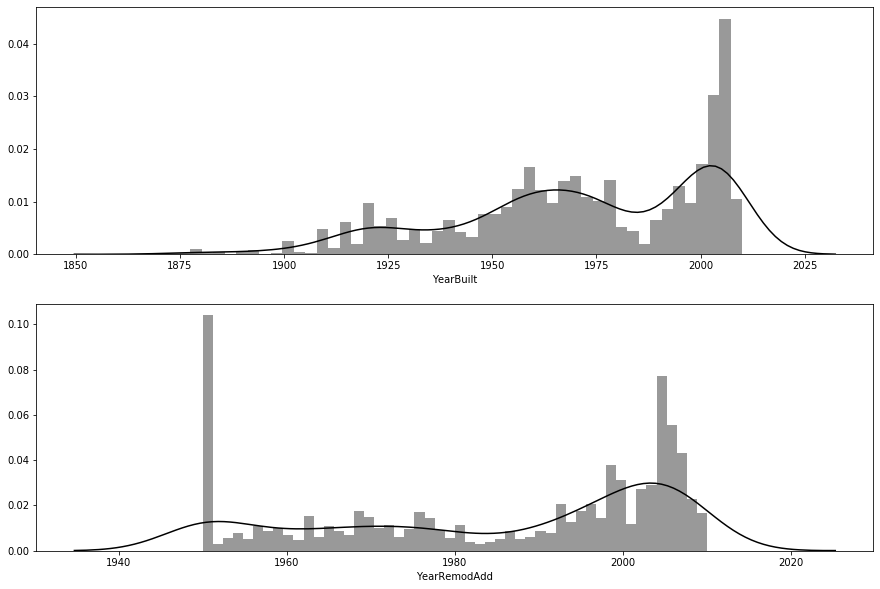

In [15]:
fig = plt.figure(figsize=(15,10));   
ax1 = fig.add_subplot(2,1,1);  
ax2 = fig.add_subplot(2,1,2);
sns.distplot(df_train['YearBuilt'],bins=50,color='black',ax=ax1)
sns.distplot(df_train['YearRemodAdd'],bins=50,color='black',ax=ax2)

Most of the houses were build in the 2000's and big chunk in 1950's and 1960's. Most of the houses were remodelled/rebuilt in 1950

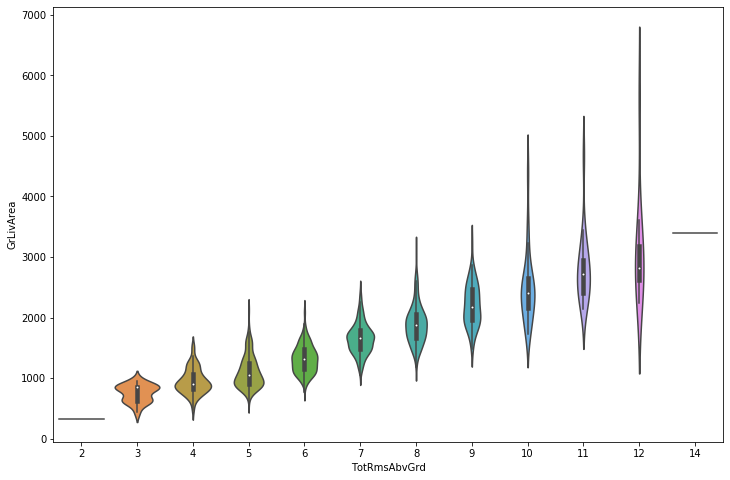

In [16]:
plt.figure(figsize=(12,8))
sns.violinplot(x='TotRmsAbvGrd',y='GrLivArea',data=df_train)

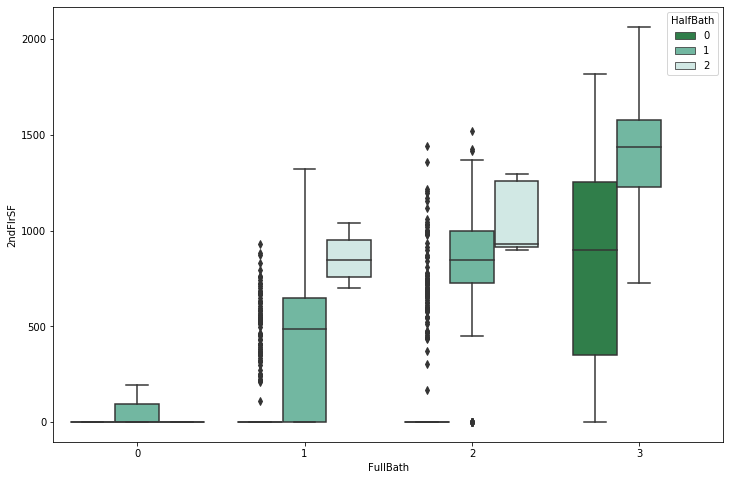

In [17]:
plt.figure(figsize=(12,8))
sns.boxplot(x='FullBath',y='2ndFlrSF',data=df_train,hue='HalfBath',palette="BuGn_r")

Number of half baths in a house is independent of full baths. As, mostly in all houses the number of half baths is 1

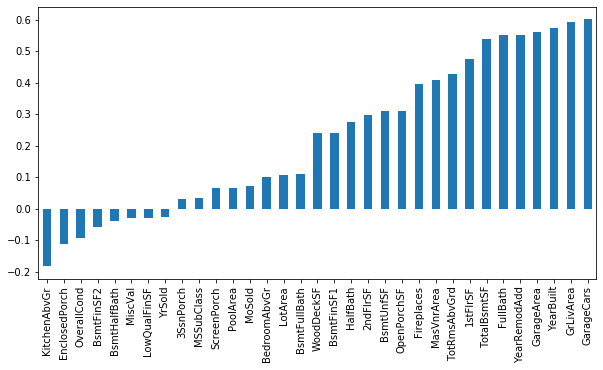

In [18]:
plt.figure(figsize=(10,5))
df_train.corr()['OverallQual'].sort_values().drop(['OverallQual','SalePrice']).plot(kind='bar')

Above plot define the parameters on which the overall quality of the house depends, that are Garage living area, Garage cars, year it was built and No. of full baths

#### Analysis on catagorical features with dtype object

In [19]:
catogorical_features_ = np.array([df_train.columns[df_train.dtypes == 'object'].to_list()])
catogorical_features_

array([['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
        'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
        'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir',
        'Electrical', 'KitchenQual', 'Functional', 'GarageFinish',
        'PavedDrive', 'SaleType', 'SaleCondition']], dtype='<U13')

In [20]:
df_train['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [21]:
# All the records in utilities are mostly AllPub 
df_train.drop('Utilities',axis=1,inplace=True)
df_test.drop('Utilities',axis=1,inplace=True)

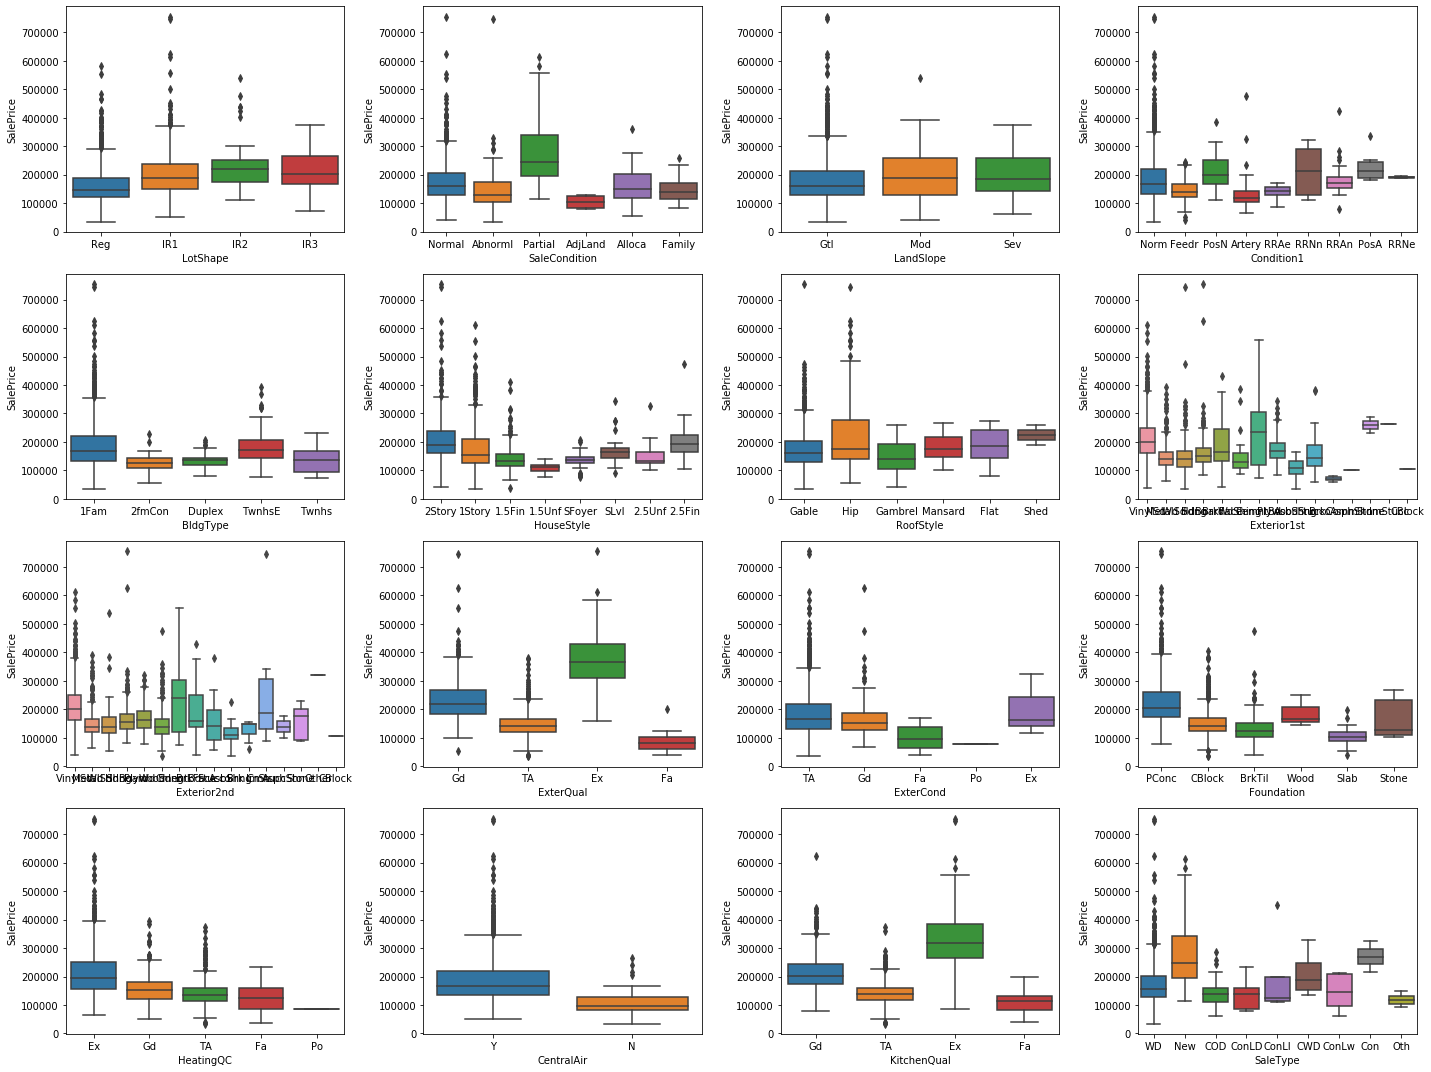

In [22]:
fig = plt.figure(figsize=(20,15));   
ax1 = fig.add_subplot(4,4,1);  
ax2 = fig.add_subplot(4,4,2);
ax3 = fig.add_subplot(4,4,3);  
ax4 = fig.add_subplot(4,4,4);
ax5 = fig.add_subplot(4,4,5);  
ax6 = fig.add_subplot(4,4,6);
ax7 = fig.add_subplot(4,4,7);  
ax8 = fig.add_subplot(4,4,8);
ax9 = fig.add_subplot(4,4,9);  
ax10 = fig.add_subplot(4,4,10);
ax11 = fig.add_subplot(4,4,11);  
ax12 = fig.add_subplot(4,4,12);
ax13 = fig.add_subplot(4,4,13);  
ax14 = fig.add_subplot(4,4,14);
ax15 = fig.add_subplot(4,4,15);  
ax16 = fig.add_subplot(4,4,16);

sns.boxplot(x="LotShape",y= "SalePrice", data=df_train,ax=ax1)
sns.boxplot("SaleCondition", "SalePrice", data=df_train, ax=ax2)
sns.boxplot("LandSlope", "SalePrice", data=df_train,ax=ax3)
sns.boxplot("Condition1", "SalePrice", data=df_train, ax=ax4)
sns.boxplot("BldgType", "SalePrice", data=df_train,ax=ax5)
sns.boxplot("HouseStyle", "SalePrice", data=df_train, ax=ax6)
sns.boxplot("RoofStyle", "SalePrice", data=df_train,ax=ax7)
sns.boxplot("Exterior1st", "SalePrice", data=df_train, ax=ax8)
sns.boxplot("Exterior2nd", "SalePrice", data=df_train,ax=ax9)
sns.boxplot("ExterQual", "SalePrice", data=df_train, ax=ax10)
sns.boxplot("ExterCond", "SalePrice", data=df_train,ax=ax11)
sns.boxplot("Foundation", "SalePrice", data=df_train, ax=ax12)
sns.boxplot("HeatingQC", "SalePrice", data=df_train,ax=ax13)
sns.boxplot("CentralAir", "SalePrice", data=df_train, ax=ax14)
sns.boxplot("KitchenQual", "SalePrice", data=df_train,ax=ax15)
sns.boxplot("SaleType", "SalePrice", data=df_train, ax=ax16)
plt.tight_layout()

Lotshape
- Houses with IR3 type of lots have maximum SalePrice

SaleConditions
- It is an important attribute as vatiation in SalePrice is more in it with the change in the parameters.
- Houses with partial salescondition has maximum sales.

LandSlope does not play an integral part in estimation of SalePrice

Condition 1
- So people prefer to pay more for the lots within the range of 200' to the north-south rail-road. 
- People prefer to pay less for the lots adjacent to arterial street.

HouseStyle
- 2 story and 1 story housing styles have better sales price than the other ones.
- The other housing styles follow the constant trends for the sales price.

ExterQual
- People are willing to pay more for the houses having excellent external quality.

SaleType
- The salesprice of the houses which are freshly constructed are maximum. 

In [23]:
df_train['Foundation'].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

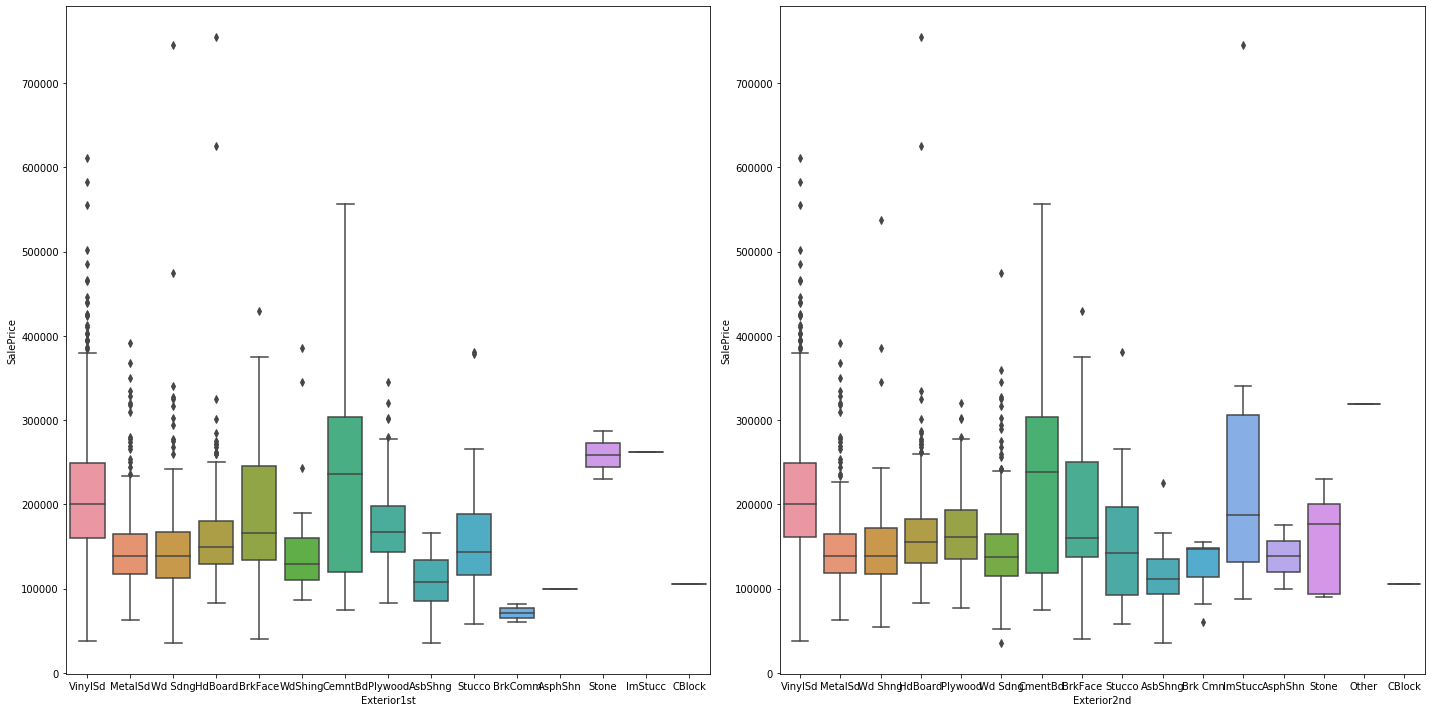

In [23]:
fig = plt.figure(figsize=(20,10));   
ax1 = fig.add_subplot(1,2,1);  
ax2 = fig.add_subplot(1,2,2);
sns.boxplot("Exterior1st", "SalePrice", data=df_train, ax=ax1)
sns.boxplot("Exterior2nd", "SalePrice", data=df_train,ax=ax2)
plt.tight_layout()

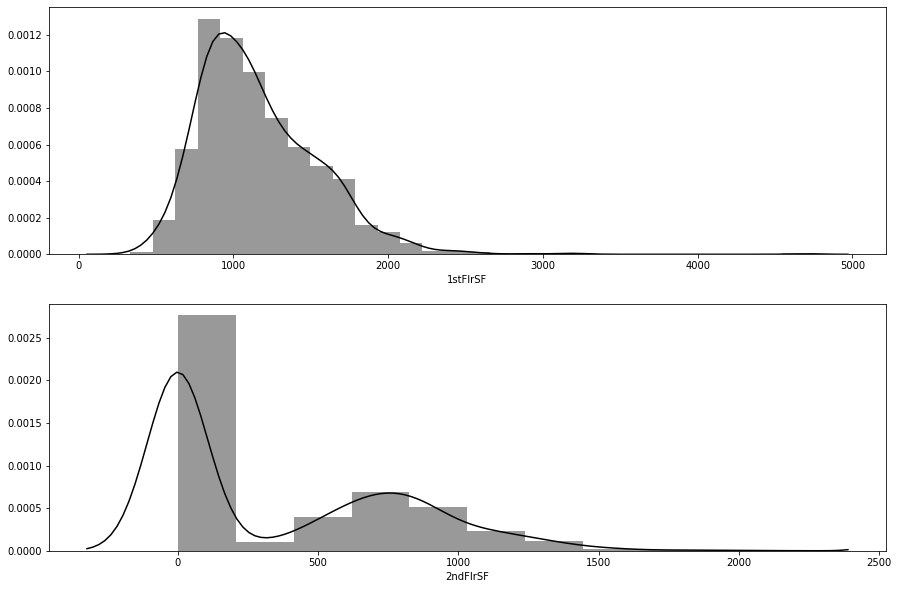

In [24]:
fig = plt.figure(figsize=(15,10));   
ax1 = fig.add_subplot(2,1,1);  
ax2 = fig.add_subplot(2,1,2);
sns.distplot(df_train['1stFlrSF'],bins=30,color='black',ax=ax1)
sns.distplot(df_train['2ndFlrSF'],bins=10,color='black',ax=ax2)

- 1st floor sqaure feet has a normal distribution
- Houses with 2nd floor has around 0 to 250 square feet of area with some houses of range of 500 to 1000 square feet

#### Converting catagorical features into dummy variable using pandas get dummies method

In [25]:
catogorical_features_ = np.delete(catogorical_features_,np.where(catogorical_features_=='Utilities'))

In [26]:
test_match=[]
for i,feature in enumerate(catogorical_features_): 
    test_match.append( (feature,(df_train[feature].nunique()  -  df_test[feature].nunique())))
    if (df_train[feature].nunique()  -  df_test[feature].nunique()) != 0:
        df_train.drop(feature,axis=1,inplace=True)
        df_test.drop(feature,axis=1,inplace=True)

In [27]:
print(test_match)

[('Street', 0), ('LotShape', 0), ('LandContour', 0), ('LotConfig', 0), ('LandSlope', 0), ('Neighborhood', 0), ('Condition1', 0), ('Condition2', 3), ('BldgType', 0), ('HouseStyle', 1), ('RoofStyle', 0), ('RoofMatl', 4), ('Exterior1st', 2), ('Exterior2nd', 1), ('MasVnrType', 0), ('ExterQual', 0), ('ExterCond', 0), ('Foundation', 0), ('Heating', 2), ('HeatingQC', 0), ('CentralAir', 0), ('Electrical', 1), ('KitchenQual', 0), ('Functional', 0), ('GarageFinish', 0), ('PavedDrive', 0), ('SaleType', 0), ('SaleCondition', 0)]


In [28]:
catogorical_features_ = np.array([df_train.columns[df_train.dtypes == 'object'].to_list()])
dummies = []
concat_dummies=[]
for i,feature in enumerate(catogorical_features_[0]):
    dummies.append(pd.get_dummies(df_train[feature],drop_first=True))
    df_train = pd.concat([df_train,dummies[i]],axis=1) 

In [29]:
df_train.drop(['MSZoning', 'Street', 'LotShape', 'LandContour','LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
               'BldgType', 'RoofStyle','MasVnrType', 'ExterQual','Foundation',  'HeatingQC', 'CentralAir',
         'KitchenQual', 'Functional', 'GarageFinish','PavedDrive', 'SaleType', 'SaleCondition','ExterCond'],axis=1,inplace=True)

In [30]:
catogorical_features_ = np.array([df_test.columns[df_test.dtypes == 'object'].to_list()])
dummies = []
concat_dummies=[]
for i,feature in enumerate(catogorical_features_[0]):
    dummies.append(pd.get_dummies(df_test[feature],drop_first=True))
    df_test = pd.concat([df_test,dummies[i]],axis=1) 

In [31]:
df_test.drop(['MSZoning', 'Street', 'LotShape', 'LandContour','LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
               'BldgType', 'RoofStyle','MasVnrType', 'ExterQual','Foundation',  'HeatingQC', 'CentralAir',
         'KitchenQual', 'Functional', 'GarageFinish','PavedDrive', 'SaleType', 'SaleCondition','ExterCond'],axis=1,inplace=True)

# Artificial Neural Network

In [32]:
X_train = np.array(df_train.drop('SalePrice',axis=1))
y_train = np.array(df_train['SalePrice'])
X_test = np.array(df_test)

In [33]:
print('Shape of X_train {} \nShape of y_test {}\nShape of X_test {}'.format(X_train.shape,y_train.shape,X_test.shape))

Shape of X_train (1460, 139) 
Shape of y_test (1460,)
Shape of X_test (1459, 139)


#### Feature Scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

In [35]:
y_train = mms.fit_transform(y_train.reshape(-1,1))

In [36]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

Using TensorFlow backend.


In [37]:
regressor = Sequential()
regressor.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
regressor.add(Dense(units=256,activation='relu',kernel_initializer='uniform'))
regressor.add(Dense(units=256,activation='relu',kernel_initializer='uniform'))
regressor.add(Dense(units=128,activation='relu',kernel_initializer='uniform'))
regressor.add(Dense(units=1,activation='relu',kernel_initializer='uniform'))

In [38]:
regressor.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_squared_error'])

In [40]:
regressor.fit(X_train,y_train,epochs=100,batch_size=50)

Epoch 1/100
1370/1370 [==============================] - 0s 100us/step - loss: 5.7909e-04 - mean_squared_error: 5.7909e-04
Epoch 2/100
1370/1370 [==============================] - 0s 102us/step - loss: 4.0558e-04 - mean_squared_error: 4.0558e-04
Epoch 3/100
1370/1370 [==============================] - 0s 102us/step - loss: 3.3930e-04 - mean_squared_error: 3.3930e-04
Epoch 4/100
1370/1370 [==============================] - 0s 90us/step - loss: 3.2193e-04 - mean_squared_error: 3.2193e-04
Epoch 5/100
1370/1370 [==============================] - 0s 91us/step - loss: 3.0629e-04 - mean_squared_error: 3.0629e-04
Epoch 6/100
1370/1370 [==============================] - 0s 94us/step - loss: 3.0168e-04 - mean_squared_error: 3.0168e-04
Epoch 7/100
1370/1370 [==============================] - 0s 92us/step - loss: 2.9066e-04 - mean_squared_error: 2.9066e-04
Epoch 8/100
1370/1370 [==============================] - 0s 88us/step - loss: 2.8699e-04 - mean_squared_error: 2.8699e-04
Epoch 9/100
1370/1370

1370/1370 [==============================] - 0s 126us/step - loss: 1.6977e-04 - mean_squared_error: 1.6977e-04
Epoch 68/100
1370/1370 [==============================] - 0s 96us/step - loss: 1.7155e-04 - mean_squared_error: 1.7155e-04
Epoch 69/100
1370/1370 [==============================] - 0s 100us/step - loss: 1.6626e-04 - mean_squared_error: 1.6626e-04
Epoch 70/100
1370/1370 [==============================] - 0s 96us/step - loss: 1.6970e-04 - mean_squared_error: 1.6970e-04
Epoch 71/100
1370/1370 [==============================] - 0s 96us/step - loss: 1.7033e-04 - mean_squared_error: 1.7033e-04
Epoch 72/100
1370/1370 [==============================] - 0s 88us/step - loss: 1.6524e-04 - mean_squared_error: 1.6524e-04
Epoch 73/100
1370/1370 [==============================] - 0s 93us/step - loss: 1.6080e-04 - mean_squared_error: 1.6080e-04
Epoch 74/100
1370/1370 [==============================] - 0s 102us/step - loss: 1.6110e-04 - mean_squared_error: 1.6110e-04
Epoch 75/100
1370/1370 [==

Text(0, 0.5, 'loss')

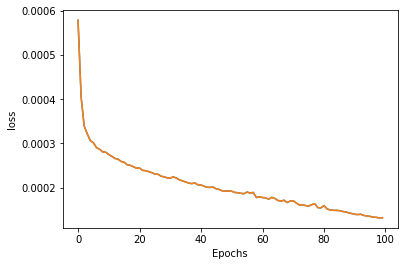

In [41]:
losses = regressor.history.history
losses = np.array(pd.DataFrame(losses))
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('loss')

## Tuning the ANN

Commenting the code for timing constraint

In [42]:
'''
def build_classifier(optimizer,units1,units2,units3,units4):
    regressor = Sequential()
    regressor.add(Dense(units=units1,activation='relu',kernel_initializer='uniform'))
    regressor.add(Dense(units=units2,activation='relu',kernel_initializer='uniform'))
    regressor.add(Dense(units=units3,activation='relu',kernel_initializer='uniform'))
    regressor.add(Dense(units=units4,activation='relu',kernel_initializer='uniform'))
    regressor.add(Dense(units=1,activation='relu',kernel_initializer='uniform'))
    regressor.compile(optimizer=optimizer,loss='mean_squared_error',metrics=['mean_squared_error'])
    return regressor

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

regressor = KerasRegressor(build_fn=build_classifier)
parameters = {'batch_size':[10,25,32],
             'epochs':[100,300,500],
             'optimizer':['adam','rmsprop'],
             'units1':[512,256],
             'units2':[256,128],
             'units3':[256,128],
             'units4':[256,128]}

grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 3)
grid_search = grid_search.fit(X_train, y_train)
'''


"\ndef build_classifier(optimizer,units1,units2,units3,units4):\n    regressor = Sequential()\n    regressor.add(Dense(units=units1,activation='relu',kernel_initializer='uniform'))\n    regressor.add(Dense(units=units2,activation='relu',kernel_initializer='uniform'))\n    regressor.add(Dense(units=units3,activation='relu',kernel_initializer='uniform'))\n    regressor.add(Dense(units=units4,activation='relu',kernel_initializer='uniform'))\n    regressor.add(Dense(units=1,activation='relu',kernel_initializer='uniform'))\n    regressor.compile(optimizer=optimizer,loss='mean_squared_error',metrics=['mean_squared_error'])\n    return regressor\n\nfrom keras.wrappers.scikit_learn import KerasRegressor\nfrom sklearn.model_selection import GridSearchCV\n\nregressor = KerasRegressor(build_fn=build_classifier)\nparameters = {'batch_size':[10,25,32],\n             'epochs':[100,300,500],\n             'optimizer':['adam','rmsprop'],\n             'units1':[512,256],\n             'units2':[256,12

In [43]:
'''print(grid_search.best_score_)
print('\n')
print(grid_search.best_params_)'''

"print(grid_search.best_score_)\nprint('\n')\nprint(grid_search.best_params_)"

In [44]:
Best = {'batch_size': 32, 'epochs': 300, 'optimizer': 'adam', 'units1': 512, 'units2': 128, 'units3': 128, 'units4': 256}

In [45]:
#from keras.models import load_model
#regressor.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model
# returns a compiled model
# identical to the previous one
#regressor1 = load_model('my_model.h5')

## Training the ANN on best parameters

In [37]:
regressor = Sequential()
regressor.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
regressor.add(Dense(units=256,activation='relu',kernel_initializer='uniform'))
regressor.add(Dense(units=128,activation='relu',kernel_initializer='uniform'))
regressor.add(Dense(units=64,activation='relu',kernel_initializer='uniform'))
regressor.add(Dense(units=1,activation='relu',kernel_initializer='uniform'))
regressor.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_squared_error'])

In [38]:
regressor.fit(X_train,y_train,epochs=500,batch_size=15)

Epoch 1/500
1460/1460 [==============================] - 0s 332us/step - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 2/500
1460/1460 [==============================] - 0s 233us/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 3/500
1460/1460 [==============================] - 0s 232us/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 4/500
1460/1460 [==============================] - 0s 243us/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 5/500
1460/1460 [==============================] - 0s 329us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 6/500
1460/1460 [==============================] - 0s 325us/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 7/500
1460/1460 [==============================] - 0s 332us/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 8/500
1460/1460 [==============================] - 0s 321us/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 9/500
1460/1460 [==============================] - 0s 329us/step - loss: 8

1460/1460 [==============================] - 0s 227us/step - loss: 1.4119e-04 - mean_squared_error: 1.4119e-04
Epoch 68/500
1460/1460 [==============================] - 0s 224us/step - loss: 1.4206e-04 - mean_squared_error: 1.4206e-04
Epoch 69/500
1460/1460 [==============================] - 0s 217us/step - loss: 1.0836e-04 - mean_squared_error: 1.0836e-04
Epoch 70/500
1460/1460 [==============================] - 0s 225us/step - loss: 1.9906e-04 - mean_squared_error: 1.9906e-04
Epoch 71/500
1460/1460 [==============================] - 0s 215us/step - loss: 1.8120e-04 - mean_squared_error: 1.8120e-04
Epoch 72/500
1460/1460 [==============================] - 0s 225us/step - loss: 1.0899e-04 - mean_squared_error: 1.0899e-04
Epoch 73/500
1460/1460 [==============================] - 0s 226us/step - loss: 1.3879e-04 - mean_squared_error: 1.3879e-04
Epoch 74/500
1460/1460 [==============================] - 0s 220us/step - loss: 1.2928e-04 - mean_squared_error: 1.2928e-04
Epoch 75/500
1460/146

1460/1460 [==============================] - 0s 229us/step - loss: 8.9586e-05 - mean_squared_error: 8.9586e-05
Epoch 133/500
1460/1460 [==============================] - 0s 227us/step - loss: 7.7873e-05 - mean_squared_error: 7.7873e-05
Epoch 134/500
1460/1460 [==============================] - 0s 223us/step - loss: 7.7066e-05 - mean_squared_error: 7.7066e-05
Epoch 135/500
1460/1460 [==============================] - 0s 227us/step - loss: 1.1081e-04 - mean_squared_error: 1.1081e-04
Epoch 136/500
1460/1460 [==============================] - 0s 234us/step - loss: 1.3119e-04 - mean_squared_error: 1.3119e-04
Epoch 137/500
1460/1460 [==============================] - 0s 286us/step - loss: 5.5602e-05 - mean_squared_error: 5.5602e-05
Epoch 138/500
1460/1460 [==============================] - 0s 290us/step - loss: 2.9690e-05 - mean_squared_error: 2.9690e-05
Epoch 139/500
1460/1460 [==============================] - 0s 289us/step - loss: 4.0366e-05 - mean_squared_error: 4.0366e-05
Epoch 140/500


1460/1460 [==============================] - 0s 333us/step - loss: 5.1887e-05 - mean_squared_error: 5.1887e-05
Epoch 198/500
1460/1460 [==============================] - 0s 253us/step - loss: 1.0491e-04 - mean_squared_error: 1.0491e-04
Epoch 199/500
1460/1460 [==============================] - 0s 248us/step - loss: 1.1036e-04 - mean_squared_error: 1.1036e-04
Epoch 200/500
1460/1460 [==============================] - 1s 382us/step - loss: 4.2836e-05 - mean_squared_error: 4.2836e-05
Epoch 201/500
1460/1460 [==============================] - 0s 331us/step - loss: 2.4318e-05 - mean_squared_error: 2.4318e-05
Epoch 202/500
1460/1460 [==============================] - 0s 259us/step - loss: 2.6683e-05 - mean_squared_error: 2.6683e-05
Epoch 203/500
1460/1460 [==============================] - 0s 254us/step - loss: 2.8896e-05 - mean_squared_error: 2.8895e-05
Epoch 204/500
1460/1460 [==============================] - 0s 257us/step - loss: 4.3066e-05 - mean_squared_error: 4.3066e-05
Epoch 205/500


1460/1460 [==============================] - 0s 245us/step - loss: 5.1525e-05 - mean_squared_error: 5.1525e-05
Epoch 263/500
1460/1460 [==============================] - 0s 285us/step - loss: 6.6881e-05 - mean_squared_error: 6.6881e-05
Epoch 264/500
1460/1460 [==============================] - 0s 246us/step - loss: 1.2629e-04 - mean_squared_error: 1.2629e-04
Epoch 265/500
1460/1460 [==============================] - 0s 241us/step - loss: 9.5043e-05 - mean_squared_error: 9.5043e-05
Epoch 266/500
1460/1460 [==============================] - 0s 238us/step - loss: 3.4113e-05 - mean_squared_error: 3.4113e-05
Epoch 267/500
1460/1460 [==============================] - 0s 301us/step - loss: 2.2031e-05 - mean_squared_error: 2.2031e-05
Epoch 268/500
1460/1460 [==============================] - 0s 279us/step - loss: 4.0641e-05 - mean_squared_error: 4.0641e-05
Epoch 269/500
1460/1460 [==============================] - 0s 221us/step - loss: 2.9537e-05 - mean_squared_error: 2.9537e-05
Epoch 270/500


1460/1460 [==============================] - 0s 292us/step - loss: 1.0376e-04 - mean_squared_error: 1.0376e-04
Epoch 328/500
1460/1460 [==============================] - 0s 231us/step - loss: 5.0189e-05 - mean_squared_error: 5.0189e-05
Epoch 329/500
1460/1460 [==============================] - 0s 249us/step - loss: 4.0344e-05 - mean_squared_error: 4.0344e-05
Epoch 330/500
1460/1460 [==============================] - 0s 229us/step - loss: 3.2835e-05 - mean_squared_error: 3.2835e-05
Epoch 331/500
1460/1460 [==============================] - 0s 230us/step - loss: 2.6851e-05 - mean_squared_error: 2.6851e-05
Epoch 332/500
1460/1460 [==============================] - 0s 226us/step - loss: 1.2451e-05 - mean_squared_error: 1.2451e-05
Epoch 333/500
1460/1460 [==============================] - 0s 225us/step - loss: 1.0033e-05 - mean_squared_error: 1.0033e-05
Epoch 334/500
1460/1460 [==============================] - 0s 225us/step - loss: 6.6142e-06 - mean_squared_error: 6.6142e-06
Epoch 335/500


1460/1460 [==============================] - 0s 217us/step - loss: 8.2568e-05 - mean_squared_error: 8.2568e-05
Epoch 393/500
1460/1460 [==============================] - 0s 213us/step - loss: 5.3282e-05 - mean_squared_error: 5.3282e-05
Epoch 394/500
1460/1460 [==============================] - 0s 211us/step - loss: 4.0292e-05 - mean_squared_error: 4.0292e-05
Epoch 395/500
1460/1460 [==============================] - 0s 208us/step - loss: 2.1985e-05 - mean_squared_error: 2.1985e-05
Epoch 396/500
1460/1460 [==============================] - 0s 218us/step - loss: 2.1801e-05 - mean_squared_error: 2.1801e-05
Epoch 397/500
1460/1460 [==============================] - 0s 213us/step - loss: 1.4236e-05 - mean_squared_error: 1.4236e-05
Epoch 398/500
1460/1460 [==============================] - 0s 209us/step - loss: 1.6569e-05 - mean_squared_error: 1.6569e-05
Epoch 399/500
1460/1460 [==============================] - 0s 213us/step - loss: 2.0686e-05 - mean_squared_error: 2.0686e-05
Epoch 400/500


1460/1460 [==============================] - 0s 226us/step - loss: 4.3254e-06 - mean_squared_error: 4.3254e-06
Epoch 458/500
1460/1460 [==============================] - 0s 217us/step - loss: 3.4921e-06 - mean_squared_error: 3.4921e-06
Epoch 459/500
1460/1460 [==============================] - 0s 249us/step - loss: 4.2711e-06 - mean_squared_error: 4.2711e-06
Epoch 460/500
1460/1460 [==============================] - 0s 249us/step - loss: 2.8453e-06 - mean_squared_error: 2.8453e-06
Epoch 461/500
1460/1460 [==============================] - 0s 221us/step - loss: 6.1706e-06 - mean_squared_error: 6.1706e-06
Epoch 462/500
1460/1460 [==============================] - 0s 230us/step - loss: 7.9296e-06 - mean_squared_error: 7.9296e-06
Epoch 463/500
1460/1460 [==============================] - 0s 223us/step - loss: 4.0016e-05 - mean_squared_error: 4.0016e-05
Epoch 464/500
1460/1460 [==============================] - 0s 225us/step - loss: 4.7865e-05 - mean_squared_error: 4.7865e-05
Epoch 465/500


Text(0, 0.5, 'loss')

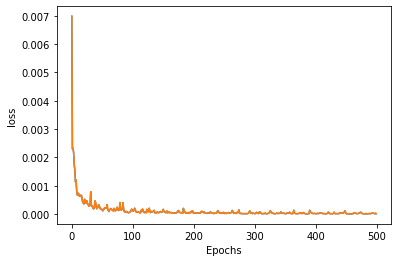

In [39]:
losses = regressor.history.history
losses = np.array(pd.DataFrame(losses))
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('loss')

In [40]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               71680     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 244,225
Trainable params: 244,225
Non-trainable params: 0
_________________________________________________________________


## Prediction on test set

In [41]:
y_pred = regressor.predict(X_test) 
y_pred_original = mms.inverse_transform(y_pred.reshape(-1,1))
y_pred_original = y_pred_original.tolist()
y_pred_original = [pred for i in y_pred_original for pred in i]

In [42]:
test_set = pd.read_csv('test.csv')
submission = pd.DataFrame({'Id': test_set['Id'],'SalePrice': y_pred_original})

In [43]:
submission.to_csv('submission.csv', index=False)